# Import Necessary Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
import geopandas as gpd
from shapely.geometry import Point
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN


# Ignore warnings for cleaner outputs
warnings.filterwarnings('ignore')

# ==================================
# Heading for Data Visualization with Plotly
# ==================================
import plotly.express as px
import plotly.subplots as sp

# Import data

In [ ]:
df_daily_rent_detail= pd.read_csv("../data/raw/daily_rent_detail.csv")
df_station_list= pd.read_csv("../data/raw/station_list.csv")
df_usage_frequency= pd.read_csv("../data/raw/usage_frequency.csv")
df_weather= pd.read_csv("../data/raw/weather.csv")

In [30]:
df_daily_rent_detail.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual


In [31]:
df_daily_rent_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16086672 entries, 0 to 16086671
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.6+ GB


In [32]:
df_daily_rent_detail.describe()

,start_lat,start_lng,end_lat,end_lng
count,1.608666e+07,1.608666e+07,1.606074e+07,1.606074e+07
mean,3.890389e+01,-7.703200e+01,3.890290e+01,-7.703162e+01
std,2.758673e-02,3.436006e-02,4.704474e-02,8.250517e-02
min,3.873000e+01,-7.740000e+01,0.000000e+00,-7.810000e+01
25%,3.889054e+01,-7.704463e+01,3.889050e+01,-7.704468e+01
50%,3.890304e+01,-7.703150e+01,3.890257e+01,-7.703000e+01
75%,3.891554e+01,-7.701350e+01,3.891305e+01,-7.701237e+01
max,3.914000e+01,-7.678414e+01,4.307000e+01,0.000000e+00


In [33]:
def print_heading(title):
    """Prints a formatted heading."""
    print("=" * 70)
    print(" " * 25 + title)
    print("=" * 70)

def print_dataset_info(df):
    """Prints various information about the dataset."""
    # Main heading
    print_heading("Info of Dataset")

    # Sample 8 rows from the DataFrame
    print_heading("Sample of 8 Rows")
    print(df.sample(8))
    print("\n")

    # Display DataFrame info
    print_heading("DataFrame Info")
    df.info()
    print("\n")

    # Percentage of missing values
    print_heading("Percentage of Missing Values")
    missing_percentage = df.isnull().sum() / len(df) * 100
    print(missing_percentage)
    print("\n")

    # Shape of the DataFrame
    print_heading("Shape of DataFrame")
    print(df.shape)
    print("\n")

    # Columns of the DataFrame
    print_heading("Columns of DataFrame")
    print(df.columns)
    print("\n")

    # Check for duplicated rows
    print_heading("Count of Duplicated Rows")
    print(df.duplicated().sum())
    print("\n")

    # Describe the DataFrame
    print_heading("Descriptive Statistics")
    print(df.describe())
    
    
    
print_dataset_info(df_daily_rent_detail)

                         Info of Dataset
                         Sample of 8 Rows
                   ride_id  rideable_type           started_at  \
9318650   3F8AAFE3BE86D8B3   classic_bike  2023-05-01 22:23:15   
5698269   0027FE0346F1CE86    docked_bike  2022-06-27 12:33:41   
10045511  A4C8AFA681B72BEA  electric_bike  2023-07-01 14:29:59   
2559771   7B0EC3C49BD1914C   classic_bike  2021-06-27 08:37:00   
504230    4E6E150799B877F0    docked_bike  2020-07-19 17:19:55   
9647261   BF1E8E5759095FC3  electric_bike  2023-06-25 01:34:45   
7650156   77B5F6022D0A26FD   classic_bike  2022-11-08 18:31:11   
10596022  CD6666585F86ADCB   classic_bike  2023-08-30 09:51:06   

                     ended_at                           start_station_name  \
9318650   2023-05-01 22:26:47                          14th & Newton St NW   
5698269   2022-06-27 12:50:01  Henry Bacon Dr & Lincoln Memorial Circle NW   
10045511  2023-07-01 15:12:48                       19th St N & Ft Myer Dr   
2559771   

# Data understanding

Kích thước df_daily_rent_detail gốc: (804333, 13)
Kích thước df_raw (sau lọc): (40217, 13)
============================== BƯỚC 1: KHÁM PHÁ CẤU TRÚC ==============================
Kích thước dữ liệu (Dòng, Cột): (40217, 13)

--- Thông tin kiểu dữ liệu ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40217 entries, 0 to 804320
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             40217 non-null  object 
 1   rideable_type       40217 non-null  object 
 2   started_at          40217 non-null  object 
 3   ended_at            40217 non-null  object 
 4   start_station_name  36584 non-null  object 
 5   start_station_id    36584 non-null  float64
 6   end_station_name    36278 non-null  object 
 7   end_station_id      36276 non-null  float64
 8   start_lat           40217 non-null  float64
 9   start_lng           40217 non-null  float64
 10  end_lat             40141 non-null  float6

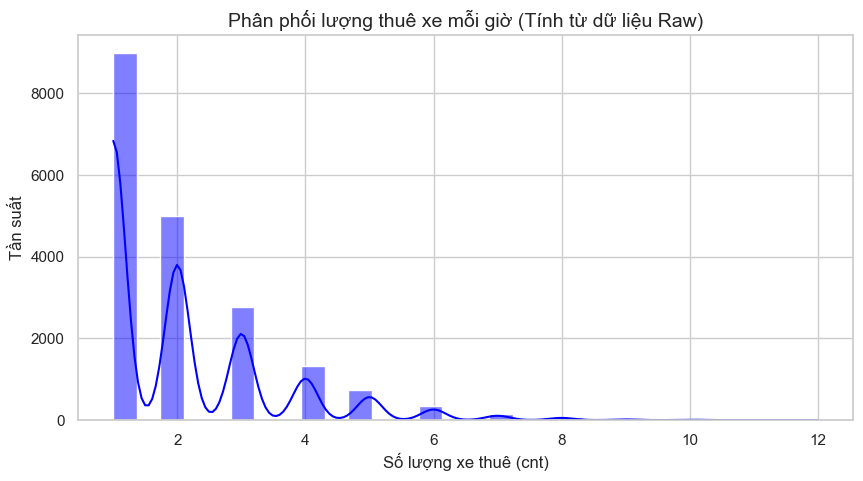


--- Vẽ biểu đồ Time Series đa chiều ---


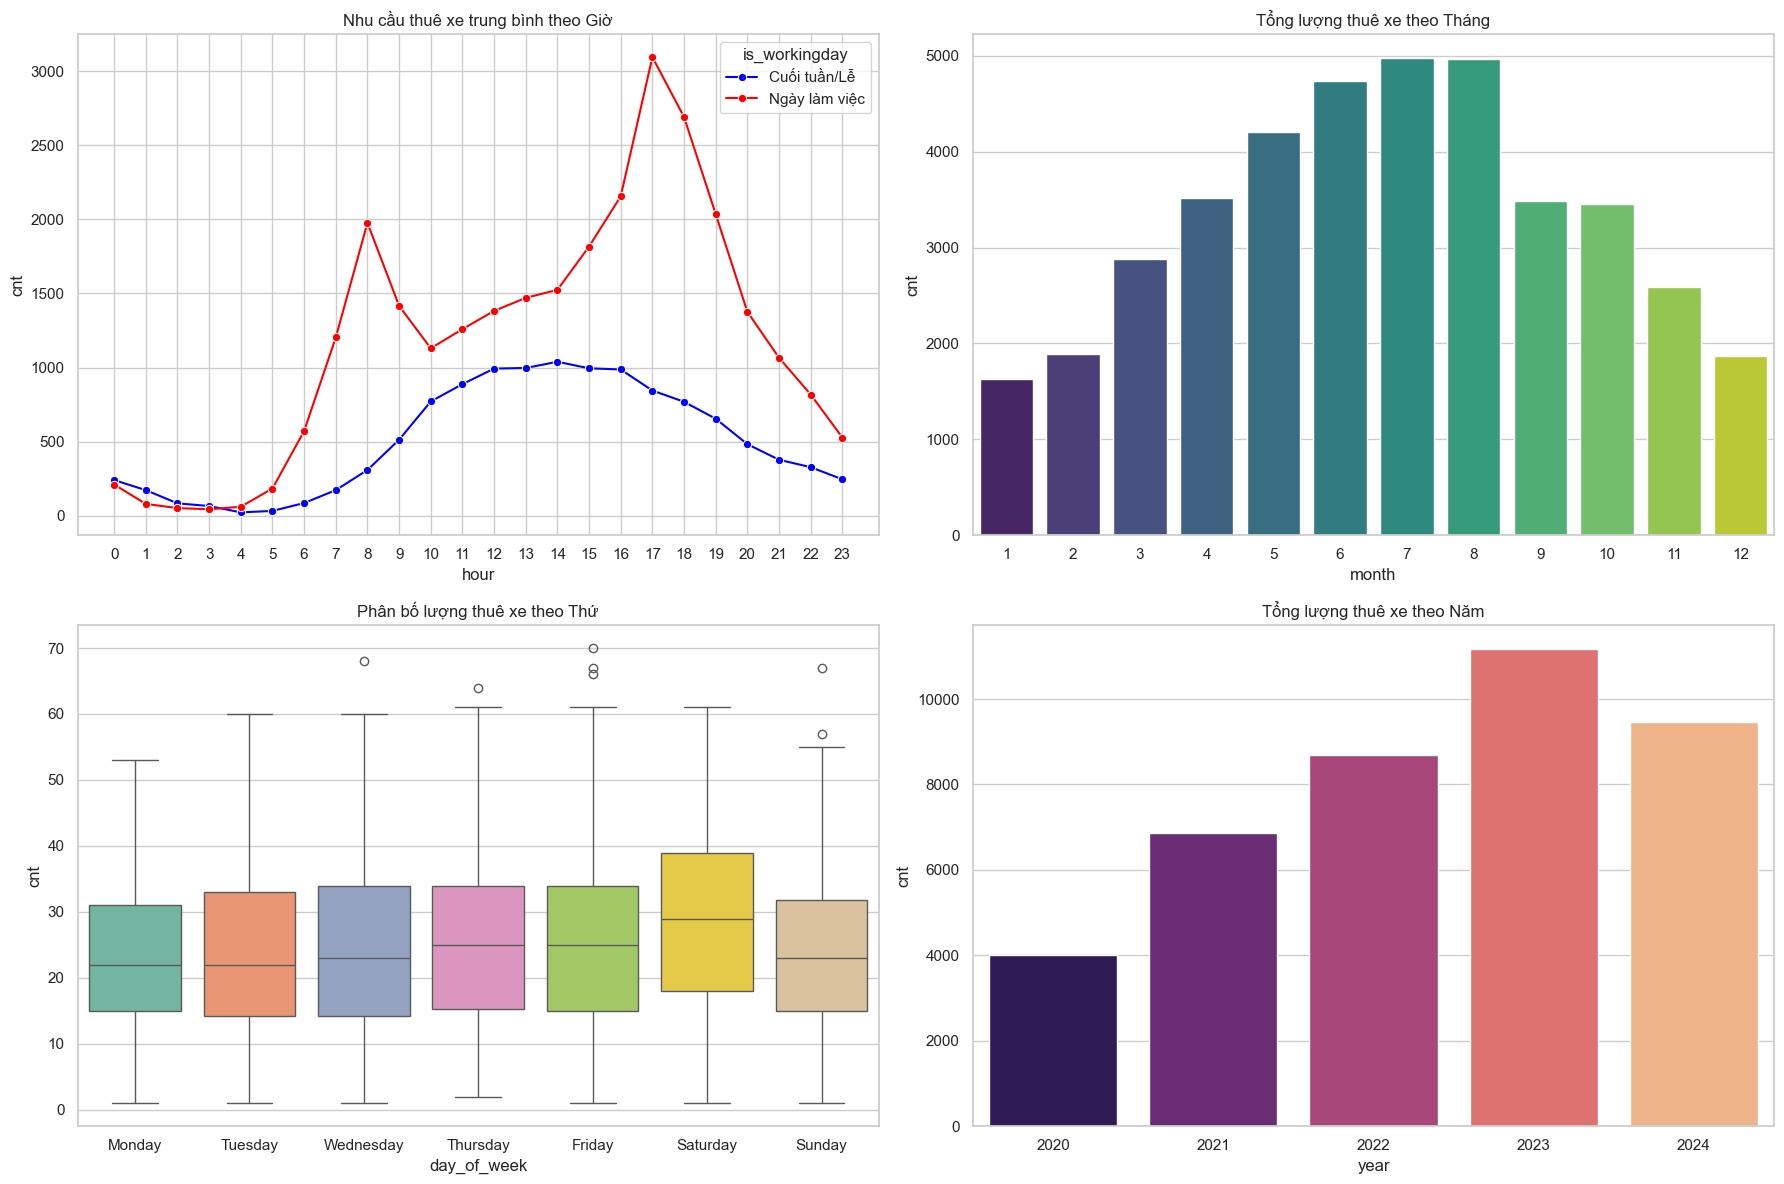


============================== BƯỚC 3: KIỂM TRA CHẤT LƯỢNG DỮ LIỆU ==============================
--- Số lượng giá trị thiếu (Missing Values) ---
start_station_name    3633
start_station_id      3633
end_station_name      3939
end_station_id        3941
end_lat                 76
end_lng                 76
dtype: int64

--- Số chuyến đi bị trùng lặp ID: 0 ---

--- Số chuyến đi lỗi thời gian (Âm hoặc > 24h): 87 ---
               started_at            ended_at  duration_min
3780  2020-05-08 20:01:38 2020-05-08 20:01:36     -0.033333
10240 2020-06-11 19:15:27 2020-06-12 20:15:21   1499.900000
13880 2020-06-27 15:11:43 2020-06-27 15:11:35     -0.133333
14080 2020-06-03 18:29:37 2020-06-04 19:29:30   1499.883333
14360 2020-06-03 16:23:01 2020-06-04 17:22:54   1499.883333

--- Thống kê nhanh Tọa độ (Check Min/Max để tìm điểm bất thường) ---
          start_lat     start_lng       end_lat       end_lng
count  40217.000000  40217.000000  40141.000000  40141.000000
mean      38.903970    -77.

In [ ]:
import seaborn as sns
from seaborn import heatmap

# Cấu hình giao diện biểu đồ cho đẹp
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Giả sử dữ liệu của bạn đang nằm trong biến df
# Nếu chưa load, bỏ comment dòng dưới:
# df = pd.read_csv('hour.csv') 

# ==============================================================================
# BƯỚC 0: LOAD DỮ LIỆU (ĐÃ SỬA ĐỂ KHÔNG BỊ TRÀN RAM)
# ==============================================================================
# ::20 nghĩa là: Lấy từ đầu đến cuối, cứ cách 20 dòng lấy 1 dòng
df_raw = df_daily_rent_detail.iloc[::20].copy()

# Kiểm tra kết quả
print(f"Kích thước df_daily_rent_detail gốc: {df_daily_rent_detail.shape}")
print(f"Kích thước df_raw (sau lọc): {df_raw.shape}")

# ==============================================================================
# BƯỚC 1: KHÁM PHÁ CẤU TRÚC DỮ LIỆU (STRUCTURE EXPLORATION)
# ==============================================================================
print("="*30 + " BƯỚC 1: KHÁM PHÁ CẤU TRÚC " + "="*30)

# 1.1. Số bản ghi và số biến
print(f"Kích thước dữ liệu (Dòng, Cột): {df_raw.shape}")

# 1.2. Kiểm tra kiểu dữ liệu
print("\n--- Thông tin kiểu dữ liệu ---")
print(df_raw.info())

# 1.3. Xử lý dữ liệu thời gian (Nếu cột ngày tháng chưa phải là datetime)
# (Thay 'dteday' bằng tên cột ngày tháng thực tế của bạn)
if 'started_at' in df_raw.columns:
    df_raw['started_at'] = pd.to_datetime(df_raw['started_at'], format='mixed')
    # Bổ sung cột năm, tháng, thứ nếu thiếu
    df_raw['year'] = df_raw['started_at'].dt.year
    df_raw['month'] = df_raw['started_at'].dt.month
    df_raw['day_of_week'] = df_raw['started_at'].dt.day_name()
# 1.4. Thống kê phân bố theo thời gian
print("\n--- Phân bố dữ liệu theo Năm ---")
print(df_raw['year'].value_counts().sort_index())
print("\n--- Phân bố dữ liệu theo Tháng ---")
print(df_raw['month'].value_counts().sort_index())

# ==============================================================================
# BƯỚC 2: THỐNG KÊ MÔ TẢ & TRỰC QUAN HÓA (DESCRIPTIVE & VISUALIZATION)
# ==============================================================================
print("\n" + "="*30 + " BƯỚC 2: THỐNG KÊ MÔ TẢ & TRỰC QUAN " + "="*30)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==============================================================================
# 2.1. BIỂU ĐỒ PHÂN BỐ CỦA BIẾN MỤC TIÊU (ĐÃ SỬA LỖI CHO RAW DATA)
# ==============================================================================
# Biến mục tiêu là 'cnt' (Số lượng xe thuê trong một khoảng thời gian, ví dụ 1 giờ)
print("\n--- Biểu đồ phân bố của biến mục tiêu 'cnt' ---")

# 1. Đảm bảo cột thời gian đã đúng định dạng
col_time = 'started_at'  # Tên cột trong file Raw của bạn
# Chuyển đổi sang datetime, xử lý lỗi format mixed
df_raw[col_time] = pd.to_datetime(df_raw[col_time], format='mixed', errors='coerce')

# 2. TÍNH TOÁN 'cnt': Gom nhóm theo từng Giờ cụ thể (Date + Hour)
# Tạo cột tạm 'date_hour' để làm tròn thời gian về đầu giờ
df_raw['date_hour'] = df_raw[col_time].dt.floor('h')

# Đếm số dòng trong mỗi giờ -> Đây chính là 'cnt' (Lượng cầu)
df_hourly_counts = df_raw.groupby('date_hour').size().reset_index(name='cnt')

# 3. Vẽ biểu đồ Histogram phân phối
plt.figure(figsize=(10, 5))
sns.histplot(df_hourly_counts['cnt'], kde=True, bins=30, color='blue')
plt.title('Phân phối lượng thuê xe mỗi giờ (Tính từ dữ liệu Raw)', fontsize=14)
plt.xlabel('Số lượng xe thuê (cnt)')
plt.ylabel('Tần suất')
plt.show()

# ==============================================================================
# 2.2. PHÂN TÍCH THEO THỜI GIAN (TIME SERIES ANALYSIS)
# ==============================================================================
print("\n--- Vẽ biểu đồ Time Series đa chiều ---")

# Chuẩn bị dữ liệu cho các trục vẽ (Feature Extraction)
df_raw['hour'] = df_raw[col_time].dt.hour
df_raw['month'] = df_raw[col_time].dt.month
df_raw['year'] = df_raw[col_time].dt.year
df_raw['day_of_week'] = df_raw[col_time].dt.day_name()

# Tạo cột 'workingday' (Ngày làm vs Cuối tuần) để vẽ biểu đồ 1
# 0-4 là Thứ 2-Thứ 6 (Đi làm), 5-6 là T7-CN (Nghỉ)
df_raw['is_workingday'] = df_raw[col_time].dt.dayofweek.apply(lambda x: 'Ngày làm việc' if x <= 4 else 'Cuối tuần/Lễ')

# --- Khởi tạo khung 4 biểu đồ (2 dòng, 2 cột) ---
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# -----------------------------------------------------------
# BIỂU ĐỒ 1: Theo Giờ (So sánh Ngày làm vs Cuối tuần)
# -----------------------------------------------------------
# Cần gom nhóm trước khi vẽ lineplot để nhẹ máy và đúng ý nghĩa
plot_data_hour = df_raw.groupby(['hour', 'is_workingday']).size().reset_index(name='cnt')

sns.lineplot(ax=axes[0,0], data=plot_data_hour, x='hour', y='cnt', hue='is_workingday', marker='o', palette=['blue', 'red'])
axes[0,0].set_title('Nhu cầu thuê xe trung bình theo Giờ', fontsize=12)
axes[0,0].set_xticks(range(0, 24))
axes[0,0].grid(True)

# -----------------------------------------------------------
# BIỂU ĐỒ 2: Theo Tháng
# -----------------------------------------------------------
plot_data_month = df_raw.groupby('month').size().reset_index(name='cnt')

sns.barplot(ax=axes[0,1], data=plot_data_month, x='month', y='cnt', palette='viridis')
axes[0,1].set_title('Tổng lượng thuê xe theo Tháng', fontsize=12)

# -----------------------------------------------------------
# BIỂU ĐỒ 3: Theo Thứ trong tuần (Boxplot)
# -----------------------------------------------------------
# Để vẽ Boxplot, ta cần dữ liệu tổng hợp theo NGÀY (Daily Counts)
df_raw['date_only'] = df_raw[col_time].dt.date
# Đếm tổng xe mỗi ngày
daily_counts = df_raw.groupby(['date_only', 'day_of_week']).size().reset_index(name='cnt')

order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(ax=axes[1,0], data=daily_counts, x='day_of_week', y='cnt', order=order_day, palette='Set2')
axes[1,0].set_title('Phân bố lượng thuê xe theo Thứ', fontsize=12)

# -----------------------------------------------------------
# BIỂU ĐỒ 4: Theo Năm (Trend tăng trưởng)
# -----------------------------------------------------------
plot_data_year = df_raw.groupby('year').size().reset_index(name='cnt')

sns.barplot(ax=axes[1,1], data=plot_data_year, x='year', y='cnt', palette='magma')
axes[1,1].set_title('Tổng lượng thuê xe theo Năm', fontsize=12)

plt.tight_layout()
plt.show()

# ==============================================================================
# BƯỚC 3: KIỂM TRA CHẤT LƯỢNG DỮ LIỆU (DATA QUALITY)
# ==============================================================================
print("\n" + "="*30 + " BƯỚC 3: KIỂM TRA CHẤT LƯỢNG DỮ LIỆU " + "="*30)

# 1. Đảm bảo cột thời gian đúng định dạng (để kiểm tra logic thời gian)
# Lưu ý: Sửa tên cột 'started_at', 'ended_at' cho đúng với file của bạn
if 'started_at' in df_raw.columns and 'ended_at' in df_raw.columns:
    df_raw['started_at'] = pd.to_datetime(df_raw['started_at'], format='mixed', errors='coerce')
    df_raw['ended_at'] = pd.to_datetime(df_raw['ended_at'], format='mixed', errors='coerce')

# --- 3.1. Kiểm tra Missing Values (Giá trị thiếu) ---
print("--- Số lượng giá trị thiếu (Missing Values) ---")
missing = df_raw.isnull().sum()
# Chỉ in ra những cột có dữ liệu bị thiếu
print(missing[missing > 0]) 

# --- 3.2. Kiểm tra dữ liệu trùng lặp (Duplicate Rides) ---
# Với Raw Data, mỗi chuyến đi có 1 'ride_id' duy nhất. Cần kiểm tra trùng ID.
if 'ride_id' in df_raw.columns:
    duplicates = df_raw.duplicated(subset=['ride_id']).sum()
    print(f"\n--- Số chuyến đi bị trùng lặp ID: {duplicates} ---")
else:
    duplicates = df_raw.duplicated().sum()
    print(f"\n--- Số dòng bị trùng lặp hoàn toàn: {duplicates} ---")

# --- 3.3. Kiểm tra Logic Thời gian (Thay thế cho check 'cnt=0') ---
# Lỗi thường gặp: Thời gian kết thúc sớm hơn thời gian bắt đầu (Duration bị âm)
if 'started_at' in df_raw.columns and 'ended_at' in df_raw.columns:
    # Tính thời lượng chuyến đi (phút)
    df_raw['duration_min'] = (df_raw['ended_at'] - df_raw['started_at']).dt.total_seconds() / 60
    
    # Tìm các chuyến đi bị lỗi (Thời lượng <= 0 hoặc quá dài > 24h)
    invalid_rides = df_raw[(df_raw['duration_min'] <= 0) | (df_raw['duration_min'] > 1440)]
    
    print(f"\n--- Số chuyến đi lỗi thời gian (Âm hoặc > 24h): {len(invalid_rides)} ---")
    if len(invalid_rides) > 0:
        print(invalid_rides[['started_at', 'ended_at', 'duration_min']].head())

# --- 3.4. Kiểm tra Logic Tọa độ (Thay thế cho check 'temp/weather') ---
# Dữ liệu raw chưa có thời tiết, nhưng có tọa độ (Lat/Lng). Kiểm tra tọa độ = 0 hoặc null.
cols_geo = ['start_lat', 'start_lng', 'end_lat', 'end_lng']
existing_geo = [c for c in cols_geo if c in df_raw.columns]

if existing_geo:
    print("\n--- Thống kê nhanh Tọa độ (Check Min/Max để tìm điểm bất thường) ---")
    print(df_raw[existing_geo].describe())
    
    # Ví dụ: Latitude của Mỹ thường là 38.x, nếu thấy số 0 hoặc số lạ là lỗi
    invalid_geo = df_raw[(df_raw['start_lat'] == 0) | (df_raw['start_lng'] == 0)]
    print(f"Số dòng có tọa độ bằng 0: {len(invalid_geo)}")

# Data preprocessing

# Phân cụm theo giờ + khu vực

Kích thước df_daily_rent_detail gốc: (804333, 13)
Kích thước df_raw (sau lọc): (40217, 13)


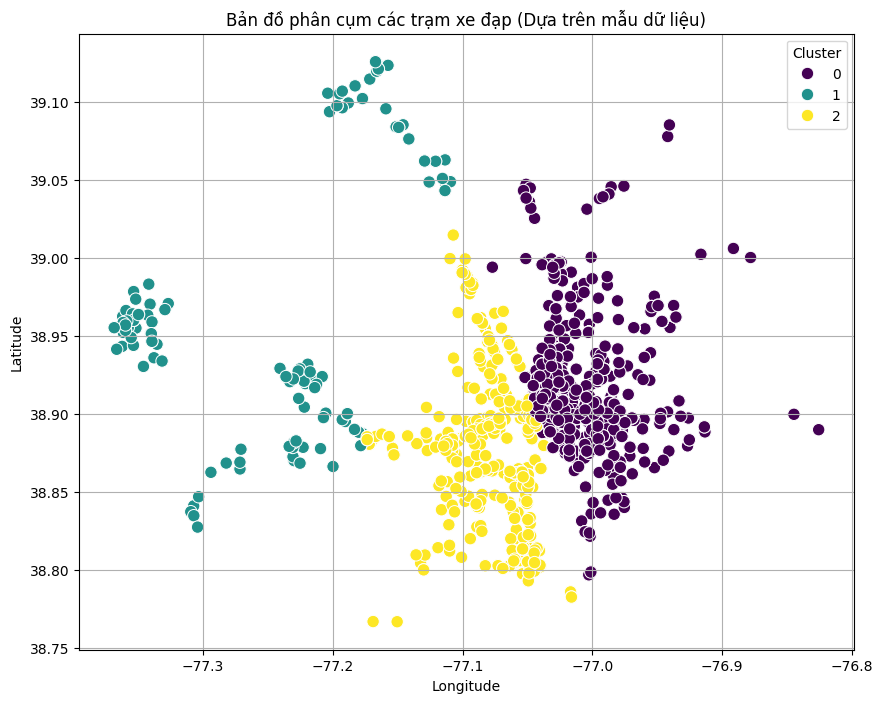

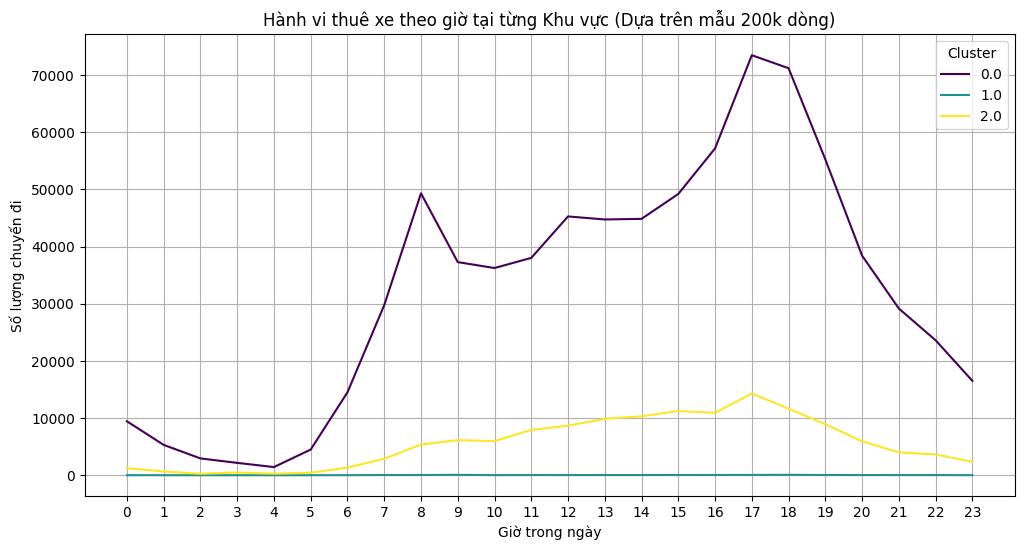

Đã xuất file thành công: data_ready_for_training.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# ==============================================================================
# BƯỚC 1: LOAD DỮ LIỆU (ĐÃ SỬA ĐỂ KHÔNG BỊ TRÀN RAM)
# ==============================================================================
# ::20 nghĩa là: Lấy từ đầu đến cuối, cứ cách 20 dòng lấy 1 dòng
df_raw = df_daily_rent_detail.iloc[::20].copy()

# Kiểm tra kết quả
print(f"Kích thước df_daily_rent_detail gốc: {df_daily_rent_detail.shape}")
print(f"Kích thước df_raw (sau lọc): {df_raw.shape}")

# ==============================================================================
# BƯỚC 2: CẤU HÌNH TÊN CỘT (QUAN TRỌNG: CẦN KHỚP VỚI KẾT QUẢ IN RA Ở TRÊN)
# ==============================================================================

# Dựa vào mô tả cột G-M của bạn, mình đoán tên cột như sau.
# Nếu chạy bị lỗi KeyError, hãy nhìn dòng "Các cột có trong file" in ra ở trên để sửa lại
col_lat = 'start_lat'       # Kiểm tra xem file là 'Start lat' hay 'Start Latitude'
col_lng = 'start_lng'       # Kiểm tra xem file là 'Start lng' hay 'Start Longitude'
col_station = 'start_station_name' 
col_time = 'started_at'

# ==============================================================================
# BƯỚC 3: PHÂN CỤM K-MEANS VÀ VẼ BẢN ĐỒ
# ==============================================================================

# Lấy danh sách trạm và tọa độ (Bỏ dữ liệu trùng lặp để nhẹ máy)
df_stations = df_raw[[col_station, col_lat, col_lng]].drop_duplicates()
df_stations = df_stations.dropna() # Bỏ dòng lỗi

# Chạy K-Means với 3 cụm
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_stations['Cluster'] = kmeans.fit_predict(df_stations[[col_lat, col_lng]])

# Vẽ bản đồ
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_stations, x=col_lng, y=col_lat, hue='Cluster', palette='viridis', s=80)
plt.title('Bản đồ phân cụm các trạm xe đạp (Dựa trên mẫu dữ liệu)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# ==============================================================================
# BƯỚC 4: VẼ BIỂU ĐỒ SO SÁNH NHU CẦU THEO GIỜ
# ==============================================================================

# Gán nhãn Cluster vào dữ liệu gốc
df_raw = df_raw.merge(df_stations[[col_station, 'Cluster']], on=col_station, how='left')

# Xử lý thời gian
df_raw[col_time] = pd.to_datetime(df_raw[col_time], format='mixed')
df_raw['Hour'] = df_raw[col_time].dt.hour

# Tổng hợp dữ liệu theo giờ và cụm để tránh lỗi bộ nhớ
df_hourly = df_raw.groupby(['Hour', 'Cluster']).size().reset_index(name='Count')

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hourly, x='Hour', y='Count', hue='Cluster', palette='viridis')
plt.title('Hành vi thuê xe theo giờ tại từng Khu vực (Dựa trên mẫu 200k dòng)')
plt.ylabel('Số lượng chuyến đi')
plt.xlabel('Giờ trong ngày')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

df_raw.to_csv('data_ready_for_training.csv', index=False)
print("Đã xuất file thành công: data_ready_for_training.csv")